In [ ]:
import networkx as nx
import random

def watts_strogatz_model(n, k, p):
    """
    Implement the Watts-Strogatz small-world model.
    
    Parameters:
    -----------
    n : int
        Number of nodes
    k : int
        Each node is connected to k nearest neighbors in ring topology
        (k/2 on each side). Must be even and k < n.
    p : float
        Probability of rewiring each edge (0 <= p <= 1)
    
    Returns:
    --------
    G : networkx.Graph
        Watts-Strogatz small-world graph
    
    Examples:
    ---------
    >>> G = watts_strogatz_model(20, 4, 0.3)
    >>> print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")
    """
    # Input validation
    if k % 2 != 0:
        raise ValueError("k must be even")
    if k >= n:
        raise ValueError("k must be less than n")
    if not (0 <= p <= 1):
        raise ValueError("p must be between 0 and 1")
    
    # Step 1: Create ring lattice
    G = nx.Graph()
    
    # Add all nodes
    for i in range(n):
        G.add_node(i)
    
    # Connect each node to k/2 neighbors on left and right
    for i in range(n):
        for j in range(1, k // 2 + 1):
            right_neighbor = (i + j) % n
            left_neighbor = (i - j) % n
            G.add_edge(i, right_neighbor)
            G.add_edge(i, left_neighbor)
    
    # Step 2: Rewire edges with probability p
    edges = list(G.edges())
    
    for edge in edges:
        i = edge[0]
        j = edge[1]
        
        # Skip if we already processed this edge from the other direction
        if i > j:
            continue
            
        # Rewire with probability p
        if random.random() < p:
            # Find all possible new targets
            possible_targets = []
            for node in range(n):
                # Can't connect to itself
                if node == i:
                    continue
                # Can't connect if already connected
                if G.has_edge(i, node):
                    continue
                possible_targets.append(node)
            
            # Only rewire if we have valid targets
            if len(possible_targets) > 0:
                new_target = random.choice(possible_targets)
                G.remove_edge(i, j)
                G.add_edge(i, new_target)
    
    return G

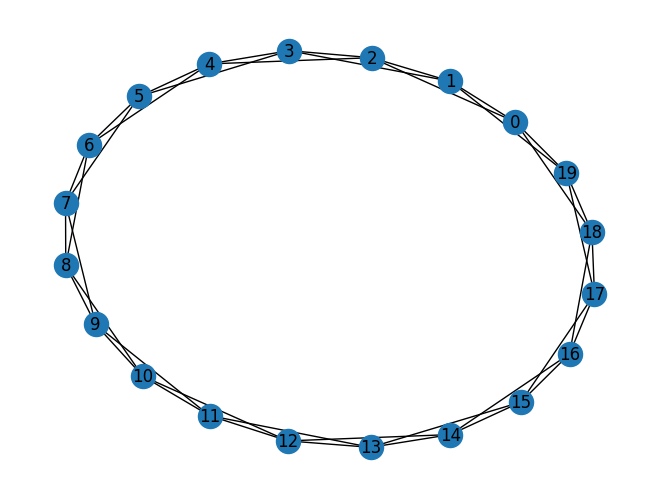

In [5]:
nx.draw(watts_strogatz_model(20, 4, 0.3), with_labels=True)